# Chandan Kumar

# Data Science and Business Analytics Intern @ The Sparks Foundation
# Task 4: Exploratory Data Analysis(EDA)-Terrorism

## Importing necessary libraries

In [1]:
#Loading the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing dataset and then cleaning it

In [2]:
terrorism_data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
terrorism_data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
terrorism_data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City',
    'attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [5]:
data=terrorism_data[['Year','Month','day','Group','Country','Region','State','City','latitude','longitude','summary','location','Attacktype','Targettype','Weapon','kill','Wound','motive','target1']]

In [6]:
data.shape

(181691, 19)

In [7]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [8]:
data.isna().sum()

Year               0
Month              0
day                0
Group              0
Country            0
Region             0
State            421
City             434
latitude        4556
longitude       4557
summary        66129
location      126196
Attacktype         0
Targettype         0
Weapon             0
kill           10313
Wound          16311
motive        131130
target1          636
dtype: int64

In [9]:
data['Wound']=data['Wound'].fillna(0)
data['kill']=data['kill'].fillna(0)

In [10]:
data['casualities']=data['Wound']+data['kill']
data[['Wound','kill','casualities']].head()

,Wound,kill,casualities
0,0.0,1.0,1.0
1,0.0,0.0,0.0
2,0.0,1.0,1.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Group        181691 non-null  object 
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   State        181270 non-null  object 
 7   City         181257 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  summary      115562 non-null  object 
 11  location     55495 non-null   object 
 12  Attacktype   181691 non-null  object 
 13  Targettype   181691 non-null  object 
 14  Weapon       181691 non-null  object 
 15  kill         181691 non-null  float64
 16  Wound        181691 non-null  float64
 17  motive       50561 non-null   object 
 18  target1      181055 non-

## Analysing the Data

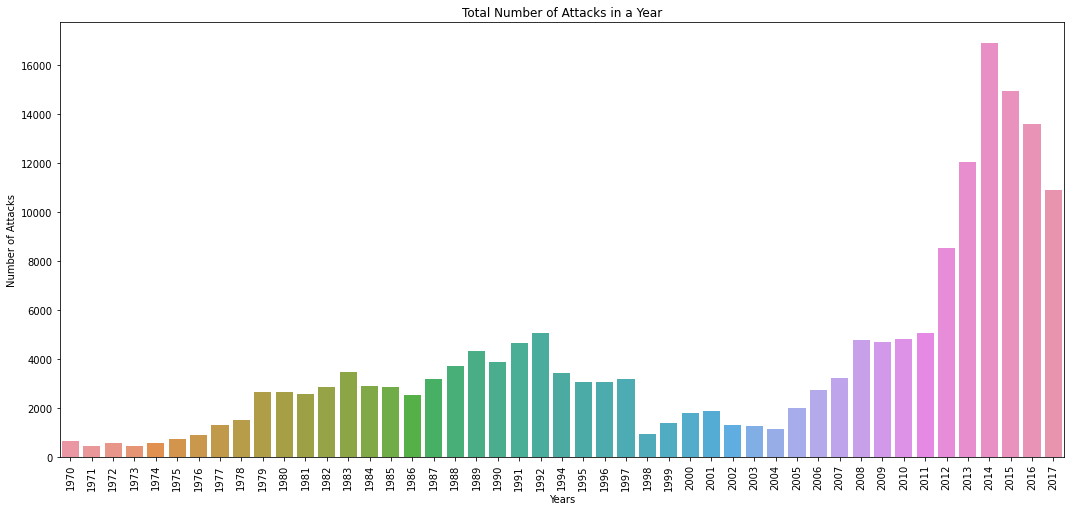

In [12]:
# Number of attacks in a year
unique_years=data['Year'].unique()
years_counts=data['Year'].value_counts().sort_index()
# unique_years,years_counts
plt.figure(figsize=(18,8))
sns.barplot(x=unique_years,y=years_counts)
plt.title('Total Number of Attacks in a Year')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

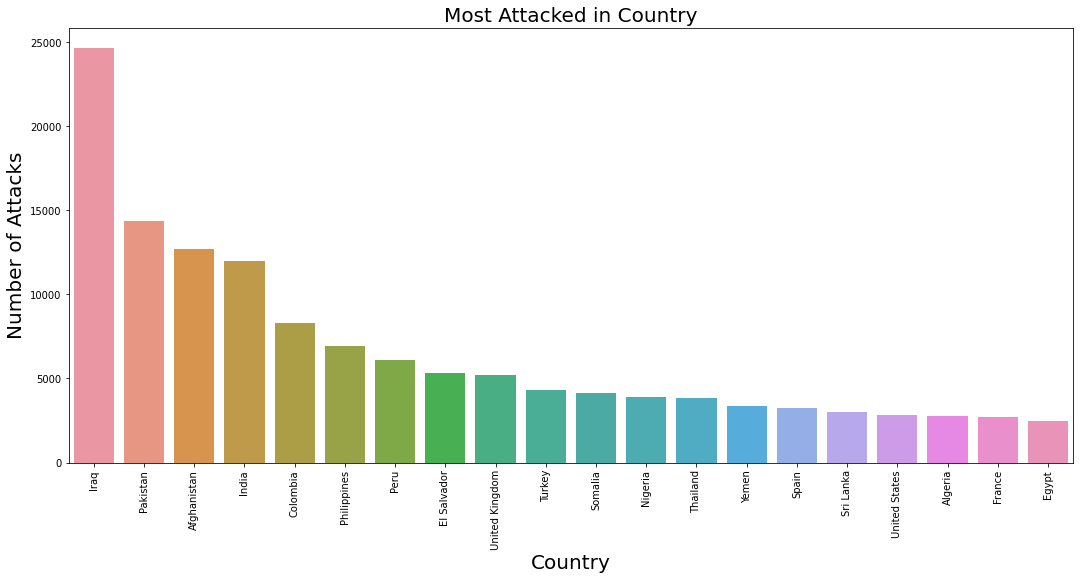

In [13]:
#Most Attcking group
attack=data.Country.value_counts()[:20]
plt.figure(figsize=(18,8))
sns.barplot(x=attack.index,y=attack.values)
plt.title('Most Attacked in Country',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xticks(rotation=90)
plt.show()

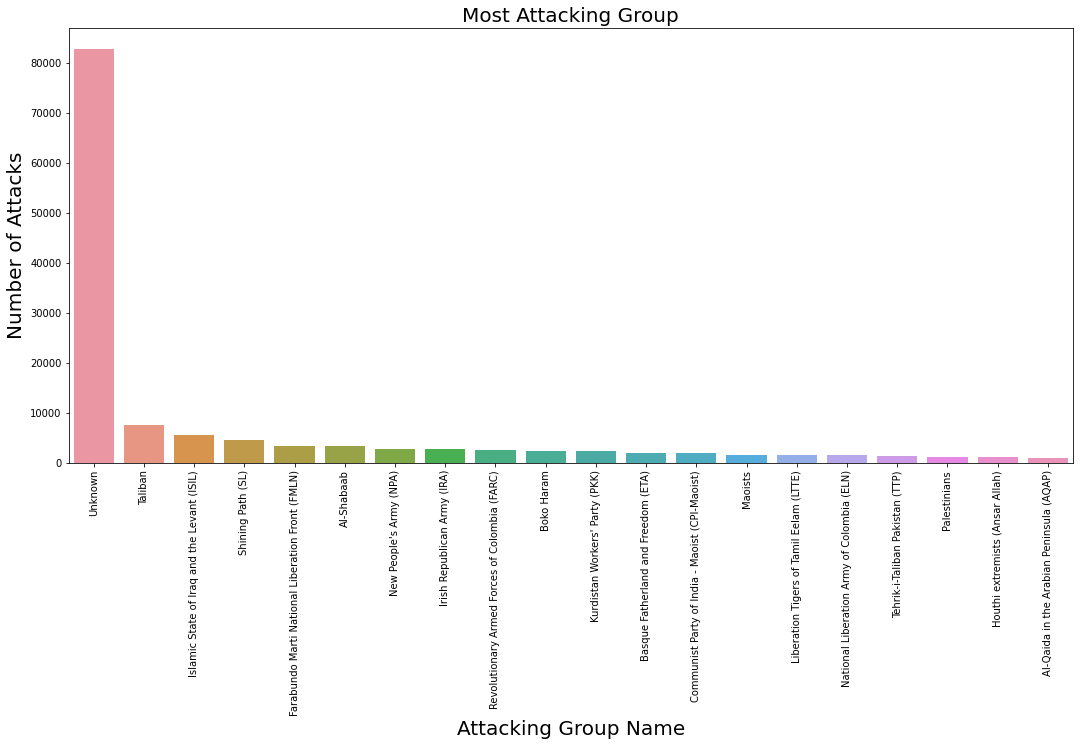

In [14]:
#Most Attcking group
group=data.Group.value_counts()[:20]
plt.figure(figsize=(18,8))
sns.barplot(x=group.index,y=group.values)
plt.title('Most Attacking Group',fontsize=20)
plt.xlabel('Attacking Group Name',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [15]:
group.values

array([82782,  7478,  5613,  4555,  3351,  3288,  2772,  2671,  2487,
        2418,  2310,  2024,  1878,  1630,  1606,  1561,  1351,  1125,
        1062,  1020], dtype=int64)

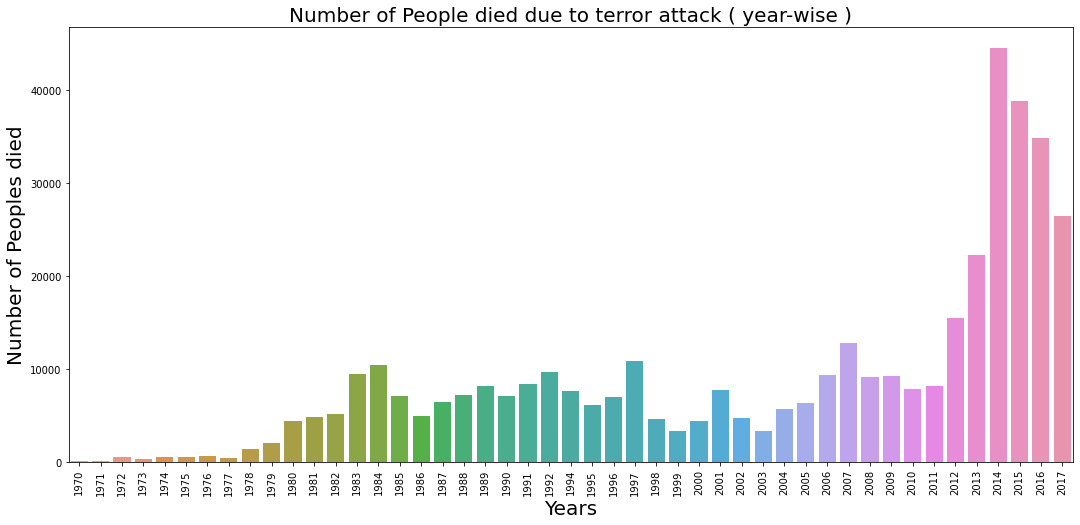

In [16]:
#Number of People died due to terror attack 
yearKill=data[['Year','kill']].groupby(['Year']).sum()
plt.figure(figsize=(18,8))
sns.barplot(x=yearKill.index,y=yearKill.values.reshape(-1))
plt.title("Number of People died due to terror attack ( year-wise )",fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Number of Peoples died',fontsize=20)
plt.xticks(rotation=90)
plt.show()

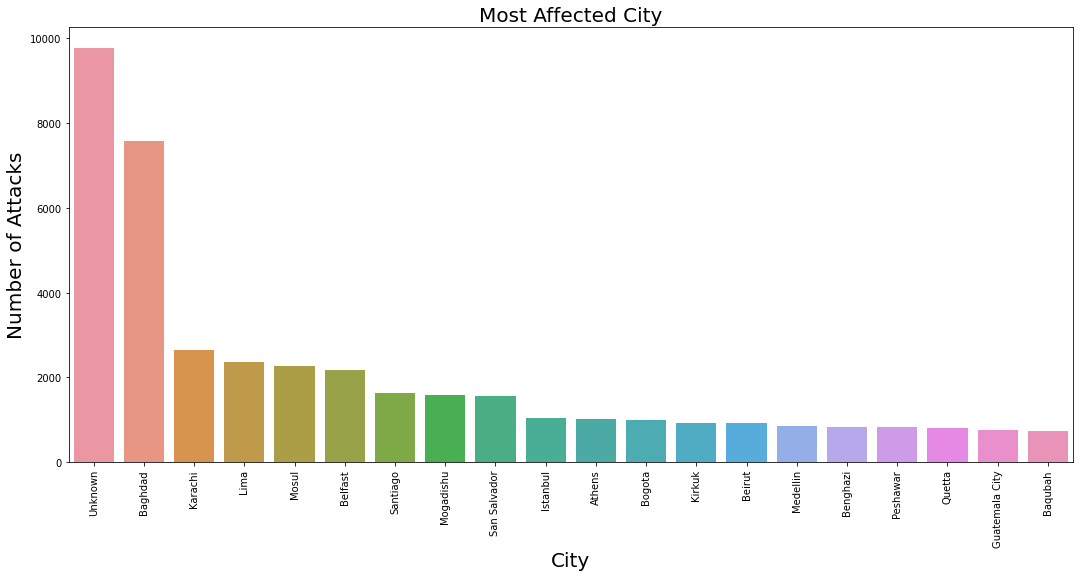

In [17]:
#Most Affected City
city=data['City'].value_counts()[:20]
plt.figure(figsize=(18,8))
sns.barplot(x=city.index,y=city.values)
plt.title("Most Affected City",fontsize=20)
plt.xlabel('City',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xticks(rotation=90)
plt.show()

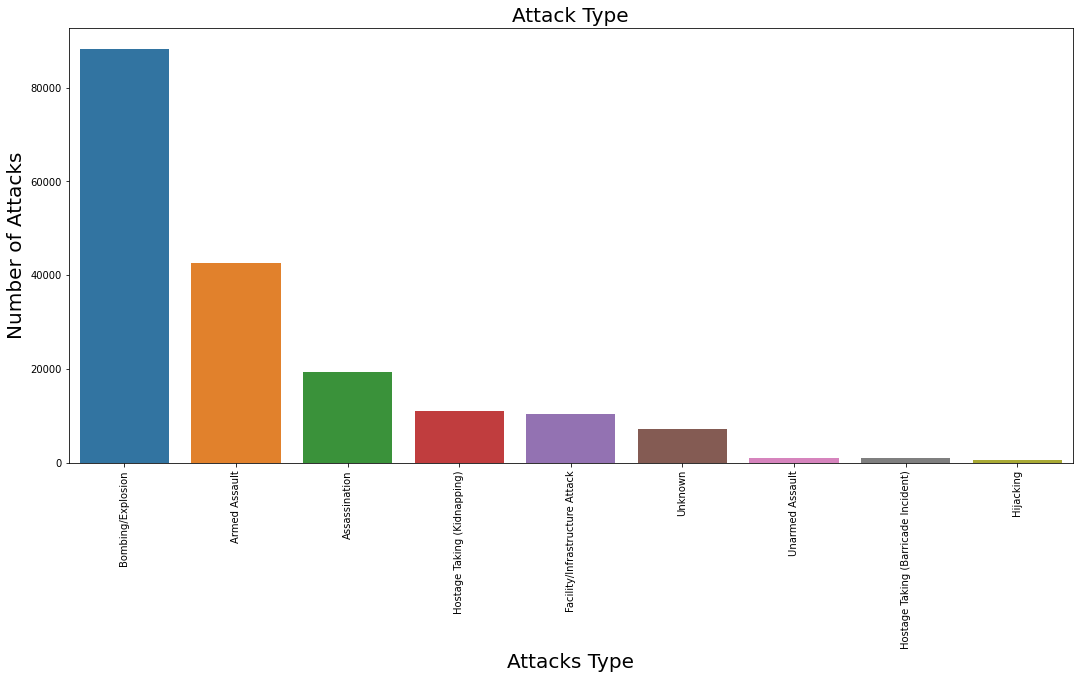

In [18]:
#AttackType Analysis
attacks=data['Attacktype'].value_counts()
plt.figure(figsize=(18,8))
sns.barplot(x=attacks.index,y=attacks.values)
plt.title("Attack Type",fontsize=20)
plt.xlabel('Attacks Type',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [19]:
data.columns

Index(['Year', 'Month', 'day', 'Group', 'Country', 'Region', 'State', 'City',
       'latitude', 'longitude', 'summary', 'location', 'Attacktype',
       'Targettype', 'Weapon', 'kill', 'Wound', 'motive', 'target1',
       'casualities'],
      dtype='object')

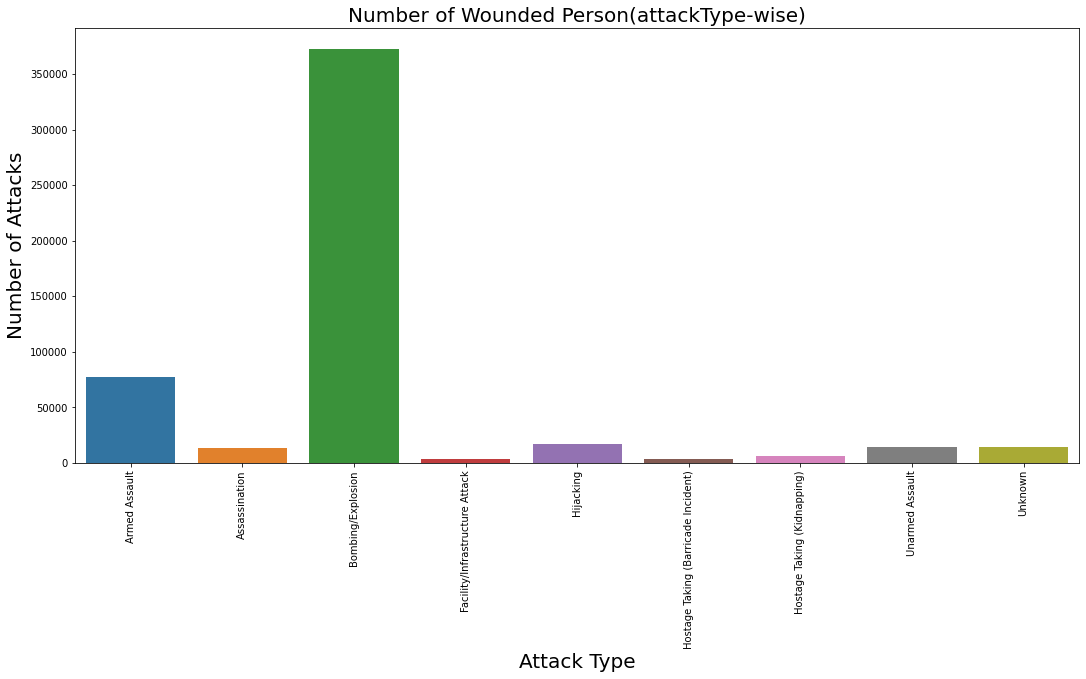

In [20]:
wound=data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum()
plt.figure(figsize=(18,8))
sns.barplot(x=wound.index,y=wound.values.reshape(-1))
plt.title("Number of Wounded Person(attackType-wise)",fontsize=20)
plt.xlabel('Attack Type',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xticks(rotation=90)
plt.show()

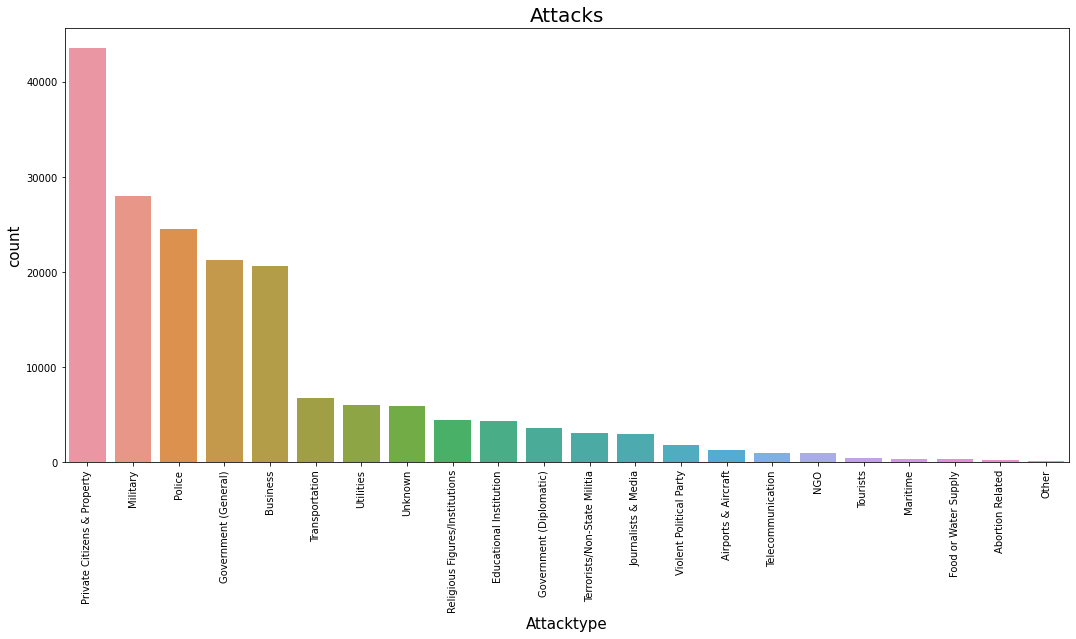

In [21]:
#Attacks
plt.subplots(figsize=(18,8))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attacks",fontsize=20)
plt.show()


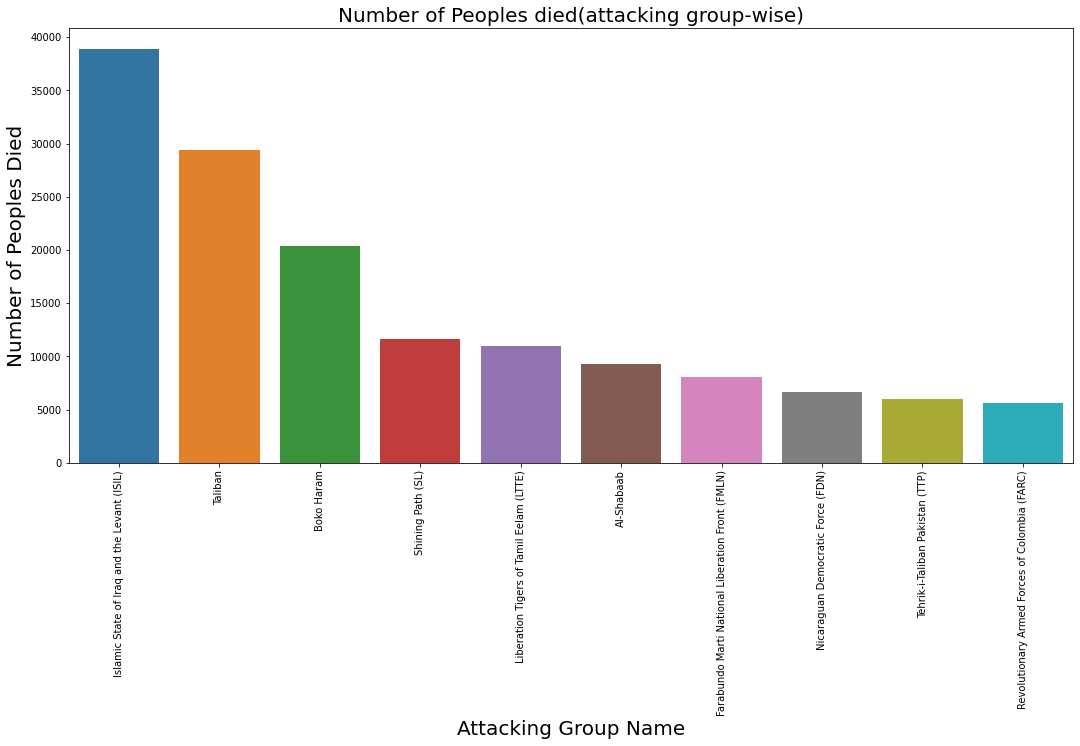

In [22]:
temp=data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10)
plt.figure(figsize=(18,8))
sns.barplot(x=temp.index,y=temp.values.reshape(-1))
plt.title("Number of Peoples died(attacking group-wise)",fontsize=20)
plt.xlabel('Attacking Group Name',fontsize=20)
plt.ylabel('Number of Peoples Died',fontsize=20)
plt.xticks(rotation=90)
plt.show()

In [23]:
df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


In [24]:
kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 411868


In [25]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [26]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


# Final Conclusion

Country with the most attacks: Iraq

City with the most attacks: Baghdad

Year with the most attacks: 2014

Month with the most attacks: 5

Group with the most attacks: Taliban

Most Attack Types: Bombing/Explosion